# 1 K-means Clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.io import loadmat

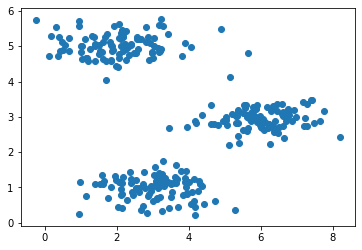

In [2]:
X = loadmat('../data/ex7data2.mat')['X']*1.0
plt.scatter(X[:,0], X[:,1])
plt.show()

## 1.1 Implementing K-means

### 1.1.1 Finding closest centroids

In [3]:
def findClosestCentroids(X, centroids):
    """
    find closest centroid fo each datapoint. no loops
    
    Parameters:
    ----------
    X: data, shape (m,n)
    centroids: shape (K, n)
    
    Return:
    -------
    C: assiment to each datapoint to it's closest centroid.
        each entry contains the index of the centroid. shape (m,)
    """

    K = centroids.shape[0]
    X_rep = np.repeat(X[:, :, np.newaxis], K, axis=2) # (m,n,K)
    dist = ((X_rep-centroids.T)**2).sum(axis=1) # (m,K)
    C = dist.argmin(axis=1)
    return C

In [4]:
def computeCentroids(X, C, K):
    """
    coputes the new centroids, by the center of each group of points.
    
    Parameters:
    -----------
    X: data, shape(m,n)
    C: assiment vector, shape(m,)
    K: number of centroids, int
    
    Return:
    -------
    centroids: the new centrois, shape(K,n)
    """
    n = X.shape[1]
    centroids = np.zeros([K,n])

    for i in range(K):
        C_idx = C==i
        C_idx_size = C_idx.sum()
        centroids[i] = X[C_idx, :].sum(axis=0)/C_idx_size
    return centroids

In [5]:
def runkMeans(X, initial_centroids, max_iters=10):
    """
    runs the K-means algo. NO stop condition, runs for all iterations
    
    Parameters:
    -----------
    X: data, shape(m,n)
    initial_centroids: shape(K,n)
    max_iters: number of iteration, int
    
    Return:
    -------
    C: assiment to each datapoint a centroid. shape(m,)
    centroids: the centrois, shape(K,n)
    
    """
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    for i in range(max_iters):
        C = findClosestCentroids(X, centroids)
        centroids = computeCentroids(X, C, K)
    return C, centroids

## 1.2 K-means on example dataset

In [6]:
def plotKmeans(X,C,centroids):
    """
    plots the result of K-means
    
    Parameters:
    -----------
    X: data, shape(m,n)
    C: assiment to each datapoint a centroid. shape(m,)
    centroids: the centrois, shape(K,n)
    
    Return:
    -------
    None
    
    """
    plt.scatter(X[:,0], X[:,1], c=C)
    plt.scatter(centroids[:,0], centroids[:,1],s=100, c='red', marker='x')

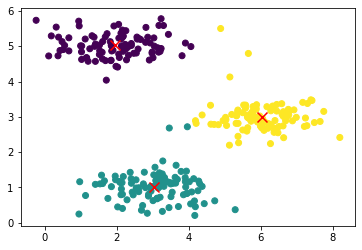

In [7]:
K = 3
initial_centroids = np.array([[3, 3],
                              [6, 2],
                              [8, 5]])
C, centroids = runkMeans(X, initial_centroids)
plotKmeans(X,C,centroids)

## 1.3 Random initialization

In [8]:
def kMeansInitCentroids(X,K):
    """ peaks K random datapoints from X without repetition.
    
    Parameters:
    -----------
    X: data, shape(m,n)
    K: number of centroids, int
    
    Return:
    -------
    initial_centroids: K random datapoits form X. shape(K,n)
    
    """
    randidx = np.random.permutation(X.shape[0])[:K]
    return X[randidx]

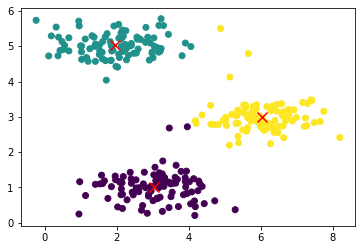

In [9]:
K = 3
initial_centroids = kMeansInitCentroids(X,K)
C, centroids = runkMeans(X, initial_centroids)
plotKmeans(X,C,centroids)

## 1.4 Image compression with K-means

(128, 128, 3)
float32


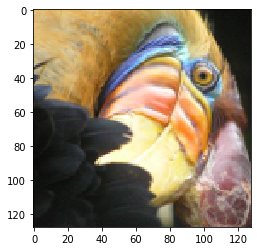

In [17]:
A = plt.imread('../data/bird_small.png')
print(A.shape)
print(A.dtype)
plt.imshow(A)

### 1.4.1 K-means on pixels

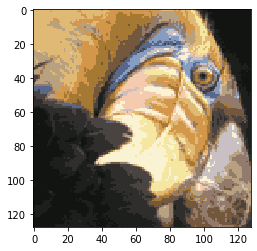

In [52]:
X = np.reshape(A, [A.shape[0] * A.shape[1], 3])
K = 16
initial_centroids = kMeansInitCentroids(X,K)

C, centroids = runkMeans(X, initial_centroids)

X_compress = np.zeros_like(X)
for i in range(K):
    X_compress[C==i] = centroids[i]

A_compress = np.reshape(X_compress, A.shape)
plt.imshow(A_compress)